In [126]:
import numpy as np
import os
import pandas as pd
import csv
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.pyplot as pyplot
import PIL.Image as Image
from PIL import ImageOps
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import paired_distances
from sklearn.manifold import MDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
labels =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'];


### load data (Only taking data_batch_1 for now for all training to limit training time)

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
data_batch_1 = unpickle("C:/Users/titus/Documents/CS498/hw3/data_batch_1")
data_batch_2 = unpickle("C:/Users/titus/Documents/CS498/hw3/data_batch_2")
data_batch_3 = unpickle("C:/Users/titus/Documents/CS498/hw3/data_batch_3")
data_batch_4 = unpickle("C:/Users/titus/Documents/CS498/hw3/data_batch_4")
data_batch_5 = unpickle("C:/Users/titus/Documents/CS498/hw3/data_batch_5")
test_batch = unpickle("C:/Users/titus/Documents/CS498/hw3/test_batch")


In [5]:
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [6]:
data_batch_1[b'data'].shape

(10000, 3072)

### 1a: Mean image 

In [18]:
sum_mean = np.zeros((10,3072))
count = np.zeros(10)
#sum over all the image data for each category 
for i in range (0, 10000):
    sum_mean[data_batch_1[b'labels'][i]] += data_batch_1[b'data'][i]
    count[data_batch_1[b'labels'][i]] += 1

In [19]:
print(count)

[ 1005.   974.  1032.  1016.   999.   937.  1030.  1001.  1025.   981.]


In [20]:
mean = sum_mean

In [21]:
#devide by the number of picture it has in that category to get the mean image 
for i in range (0, 10):
    mean[i]=sum_mean[i]/count[i]

In [22]:
print(mean[4])

[ 105.94794795  105.63963964  106.26226226 ...,  101.16116116  100.91991992
  101.48148148]


In [23]:
mean.shape

(10, 3072)

In [24]:
print(data_batch_1[b'labels'][2])

9


In [25]:
%matplotlib inline

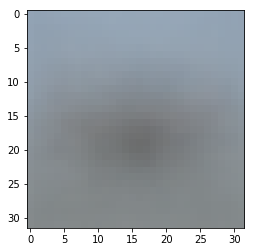

In [26]:
image = np.reshape(mean[0],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

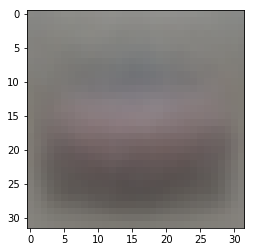

In [27]:
image = np.reshape(mean[1],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

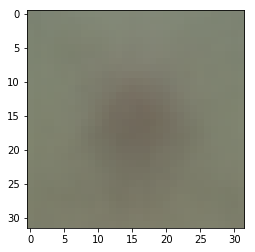

In [28]:
image = np.reshape(mean[2],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

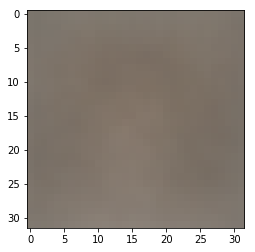

In [29]:
image = np.reshape(mean[3],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

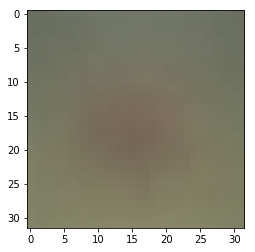

In [30]:
image = np.reshape(mean[4],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

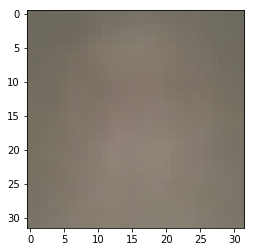

In [31]:
image = np.reshape(mean[5],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

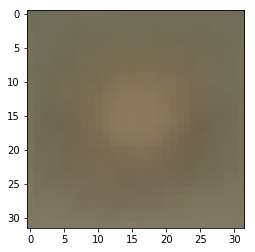

In [32]:
image = np.reshape(mean[6],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

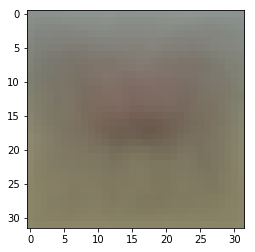

In [33]:
image = np.reshape(mean[7],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

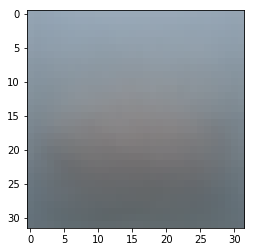

In [34]:
image = np.reshape(mean[8],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

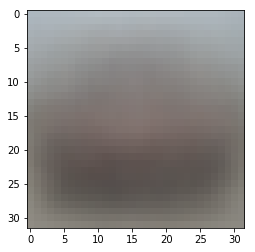

In [35]:
image = np.reshape(mean[9],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(image)
pyplot.show()

### 1b first 20 principal components

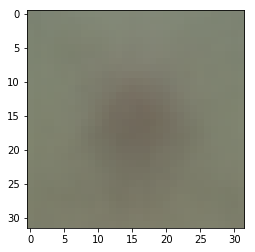

In [36]:
im = np.reshape(mean[2],(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(im)
pyplot.show()



In [37]:
data_by_labels = [] #storing the image by labels, the list would be in this structure: data_by_labels[labes][row number of image][image data array]
for i in range (0,10):
    data_by_labels.append(np.zeros((int(count[i]), 3072)))

In [38]:
len(data_by_labels[1])

974

In [130]:
temp_count_loop = np.zeros(10) #for counting row number in each cateogry for the list for adding the image data to data_by_labels
print(temp_count_loop)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [131]:
print(data_by_labels[1][6])

[ 201.  191.  194. ...,   88.   85.   91.]


In [132]:
#move data from batch to data_by_labels so data is now by labels for PCA training
for i in range (0,5000):
    data_by_labels[data_batch_1[b'labels'][i]][int(temp_count_loop[data_batch_1[b'labels'][i]])] += data_batch_1[b'data'][i]
    temp_count_loop[data_batch_1[b'labels'][i]] += 1

In [133]:
#fit pca on each labels
pca_objs = [PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20), PCA(20)]
for i in range(0,10):
    pca_objs[i].fit(data_by_labels[i])


In [134]:
print(pca_objs)

[PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), PCA(copy=True, iterated_power='auto', n_compone

In [44]:
# apply pca on one image and show it 

apply_pca = pca_objs[7].transform(data_batch_1[b'data'][11])
apply_pca_2 = pca_objs[7].inverse_transform(apply_pca)


C:\Users\titus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


1


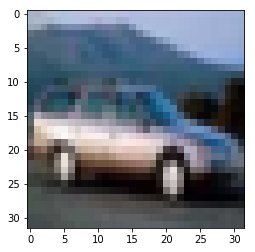

In [138]:
#show the orgainl image and the category number
image = np.reshape(data_batch_1[b'data'][4],(3,32,32)).transpose(1,2,0).astype('uint8')
print(data_batch_1[b'labels'][4])
plt.imshow(image)
pyplot.show()

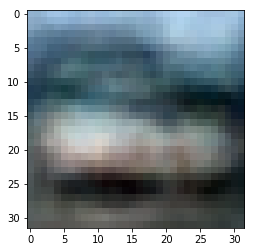

In [140]:
#after applying PCA
apply_pca = pca_objs[1].transform(data_batch_1[b'data'][4])
apply_pca_2 = pca_objs[1].inverse_transform(apply_pca)
apply_pca_3 = np.reshape(apply_pca_2,(3,32,32)).transpose(1,2,0).astype('uint8')
plt.imshow(apply_pca_3)
pyplot.show()

In [47]:
print(pca_objs[1].explained_variance_)  

[ 11955735.92921266    805415.45963858    618667.25150961
    227160.46109246    211231.18905512    186837.53517241
    174414.11108177    163352.99502285    139478.18930198
    131801.37678276    110079.37337468     92540.80265988
     83997.95960683     79698.28316123     66067.81408731
     58421.52594083     55389.58095677     54029.51110266
     49326.70336665     47094.68185062]


In [141]:
print(pca_objs[1].components_)  

[[ 0.02229041  0.02213721  0.02240078 ...,  0.01939583  0.0195282
   0.01976508]
 [-0.02493476 -0.02467004 -0.02444514 ...,  0.00879553  0.00783152
   0.00771747]
 [ 0.00217766  0.00235637  0.00240152 ...,  0.03050368  0.02935141
   0.02824483]
 ..., 
 [-0.03009869 -0.02272861 -0.01890223 ...,  0.03340016  0.02949367
   0.02729778]
 [-0.04487367 -0.04484712 -0.04652914 ..., -0.00939815 -0.00882462
  -0.01247074]
 [ 0.01037557  0.00770352 -0.00065549 ...,  0.01937886  0.01755069
   0.01758845]]


the error is the amount of variation not explained by a principal component which will we equal to pc1 eigen value divided by sum of all the eigen values ???
https://piazza.com/class/jchzguhsowz6n9?cid=489

In [ ]:
#the way I did it so apply the PCA(20) on each image and subtract that to the orginal image, but sure if that is right

In [127]:
###Error for each labels
error_by_labels = [] #storing the image by labels, the list would be in this structure: error_by_labels[labes][image data array]
for i in range (0,10):
    error_by_labels.append(np.zeros((1, 3072)))
temp_count_loop = np.zeros(10)


for i in range (0,5000):
    temp = pca_objs[data_batch_1[b'labels'][i]].transform(data_batch_1[b'data'][i]) #apply PCA on that image
    temp2 = pca_objs[data_batch_1[b'labels'][i]].inverse_transform(temp)
    error_temp = data_batch_1[b'data'][i]-temp2 #subtract to get error
    error_by_labels[data_batch_1[b'labels'][i]] = error_temp[0] + error_by_labels[data_batch_1[b'labels'][i]] #add the error to list
    temp_count_loop[data_batch_1[b'labels'][i]] += 1

In [80]:
print(temp_count_loop[1])

460.0


In [81]:
#print error
error_by_labels_sum = np.zeros(10)
for i in range (0,10):
    error_by_labels_sum[i] = error_by_labels[i].sum()
    print(error_by_labels_sum[i])

-1341.54278767
-405.602796654
4414.20719732
767.864028944
-181.888435746
-4001.6599689
-475.304373592
-3413.08824432
-1159.34028901
3001.14422568


### 2:  distances between mean image

In [48]:
#euclidean_distances(np.reshape(mean[0],(3,1024)),np.reshape(mean[1],(3,1024)))
paired_distances(mean[1],mean[0])


C:\Users\titus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\titus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1716.56209604])

In [49]:
euc_dis = np.zeros((10,10))        
for i in range(0,10):
    for j in range(0,10):
        #euc_dis[i][j] = euclidean_distances(pca_objs[i].explained_variance_,pca_objs[j].explained_variance_)
        euc_dis[i][j] = euclidean_distances(mean[i],mean[j])

C:\Users\titus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\titus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\titus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarn

In [50]:
print(euc_dis)

[[  0.00000000e+00   1.71656210e+03   1.63418564e+03   1.94296717e+03
    2.17508564e+03   2.04391884e+03   2.52843765e+03   1.67291485e+03
    9.13578218e+02   1.46019843e+03]
 [  1.71656210e+03   0.00000000e+00   8.79660011e+02   9.88844039e+02
    1.15541702e+03   1.23232824e+03   1.23855254e+03   9.33944417e+02
    1.31020094e+03   1.06742375e+03]
 [  1.63418564e+03   8.79660011e+02   2.11431983e-04   5.47389328e+02
    6.15700015e+02   7.44324302e+02   9.76240119e+02   4.58222699e+02
    1.53888416e+03   1.51262904e+03]
 [  1.94296717e+03   9.88844039e+02   5.47389328e+02   0.00000000e+00
    4.92409186e+02   4.19860843e+02   6.99141868e+02   6.61838440e+02
    1.82766963e+03   1.76034408e+03]
 [  2.17508564e+03   1.15541702e+03   6.15700015e+02   4.92409186e+02
    3.45266983e-04   5.91303051e+02   5.20300621e+02   7.51705551e+02
    2.06503944e+03   1.95747247e+03]
 [  2.04391884e+03   1.23232824e+03   7.44324302e+02   4.19860843e+02
    5.91303051e+02   2.72957517e-04   8.21902

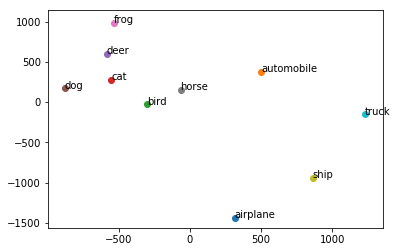

In [51]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(euc_dis)
xs, ys = pos[:, 0], pos[:, 1]
for x, y, name in zip(xs, ys, labels):
    plt.scatter(x, y)
    plt.text(x, y, name)
plt.show()

### 3  average error obtained by PCA

For class A and class B, define E(A | B) to be the average error obtained by representing all the images of class A using the mean of class A and the first 20 principal components of class B. Now define the similarity between classes to be (1/2)(E(A | B) + E(B | A)). If A and B are very similar, then this error should be small, because A's principal components should be good at representing B.

In [135]:
print(pca_objs[1].explained_variance_)


[ 47822943.71685062   3221661.83855434   2474669.00603842
    908641.84436985    844924.75622049    747350.14068933
    697656.44432679    653411.98009       557912.75723918
    527205.50716441    440317.49364522    370163.21972067
    335991.86712997    318793.13626461    264271.3487398     233685.57696559
    221571.48504999    216129.11049081    197249.33658987
    188587.92225463]


In [56]:
mean[1].shape

(3072,)

In [58]:
pca_objs[1].components_.sum()

72.593516525055549

In [60]:
print(pca_objs[1].explained_variance_)

[ 11955735.92921266    805415.45963858    618667.25150961
    227160.46109246    211231.18905512    186837.53517241
    174414.11108177    163352.99502285    139478.18930198
    131801.37678276    110079.37337468     92540.80265988
     83997.95960683     79698.28316123     66067.81408731
     58421.52594083     55389.58095677     54029.51110266
     49326.70336665     47094.68185062]


In [85]:
# average error obtained by representing all the images of class A using the mean of class A is error_by_labels
mean_error_by_labels = [] #storing the image by labels, the list would be in this structure: error_by_labels[labes][image data array]
for i in range (0,10):
    mean_error_by_labels.append(np.zeros((1, 3072)))
for i in range (0,5000):
    mean_error_temp = data_batch_1[b'data'][i]-mean[data_batch_1[b'labels'][i]] #subtract to get error
    mean_error_by_labels[data_batch_1[b'labels'][i]] = mean_error_temp + mean_error_by_labels[data_batch_1[b'labels'][i]] #add the error to list
    temp_count_loop[data_batch_1[b'labels'][i]] += 1

In [88]:
mean_error_by_labels[7]

array([[ -800.58241758, -1190.31768232, -1124.98501499, ...,
        -1497.36563437, -1646.90909091, -1534.95504496]])

In [89]:
a = error_by_labels[1]/mean_error_by_labels[1]

In [94]:
a.shape

(1, 3072)

In [96]:
b = (mean_error_by_labels[1]/error_by_labels[1])
b.shape

(1, 3072)

In [123]:
#find and store each of the (1/2)(E(A | B) + E(B | A))
err_dis = np.zeros((10,10))  
for i in range (0,10):
    for j in range(0,10):
        err_dis[i][j] = float(0.5*((error_by_labels[i]/mean_error_by_labels[j])+(error_by_labels[j]/mean_error_by_labels[i])).sum())


In [124]:
print(err_dis)


[[  3.78214350e+02   1.21362407e+02  -8.91476693e+02   6.37911623e+01
   -6.00389047e+02   1.94200012e+02   1.84271979e+02   1.59351253e+03
    4.09698776e+03  -9.87226667e+01]
 [  1.21362407e+02   1.94196800e+03  -8.95219764e+02  -4.47643503e+02
   -2.08859260e+02   8.12806009e+02  -7.42459209e+02  -6.43954006e+02
   -2.44779622e+03  -1.19899040e+02]
 [ -8.91476693e+02  -8.95219764e+02  -8.00880020e+02  -6.46764487e+02
    2.25242671e+03   1.07398466e+03   1.38020360e+03  -4.33707938e+03
   -1.22412568e+03   1.04354080e+03]
 [  6.37911623e+01  -4.47643503e+02  -6.46764487e+02   2.76071215e+02
   -1.33658262e+03  -1.05424771e+02   1.87928977e+03  -5.33040672e+01
    1.37650972e+03   8.03886131e+01]
 [ -6.00389047e+02  -2.08859260e+02   2.25242671e+03  -1.33658262e+03
    1.50507362e+03  -4.29359311e+02   1.00219172e+03  -1.57414915e+03
   -2.35147237e+03  -1.74967794e+03]
 [  1.94200012e+02   8.12806009e+02   1.07398466e+03  -1.05424771e+02
   -4.29359311e+02  -4.12321791e-01   2.74902

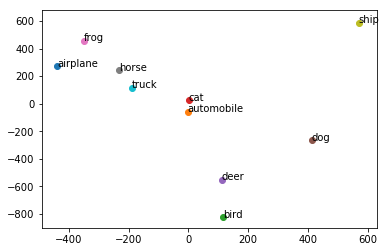

In [125]:
mds_err = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos_err = mds_err.fit_transform (err_dis.astype(np.float64))
xs_err, ys_err = pos_err[:, 0], pos_err[:, 1]
for x_err, y_err, name in zip(xs_err, ys_err, labels):
    plt.scatter(x_err, y_err)
    plt.text(x_err, y_err, name)
plt.show()